# Nonlinear bistable model

### Run single trials first
### Using single trial coefs to run average SINDy model

Decision time: 92.41
Choice: Positive threshold


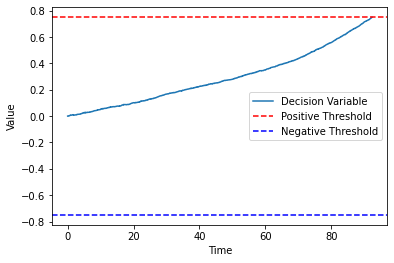

In [1]:
import numpy as np
from nlb_st import simulate_trial

# Define parameters for the trial
t = np.arange(0, 100, 0.01)
dt = 0.01
tauX = 20
epsilon = 0.05
b = 0.1
c = 0.01
z = 0.75

# Simulate the trial
x, decision_time, choice = simulate_trial(t, dt, tauX, epsilon, b, c, z)

# Print the results
print("Decision time:", decision_time)
print("Choice:", "Positive threshold" if choice == 1 else ("Negative threshold" if choice == 0 else "No decision"))

# Plot the results
import matplotlib.pyplot as plt

plt.plot(t[:len(x)], x, label='Decision Variable')
plt.axhline(z, color='r', linestyle='--', label='Positive Threshold')
plt.axhline(-z, color='b', linestyle='--', label='Negative Threshold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Number of trials: 10
Average decision time (NLB): 437.60599999999994
Average decision time (SINDy): 387.544
NLB choices (1 for positive threshold, 0 for negative threshold): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
SINDy choices (1 for positive threshold, 0 for negative threshold): [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


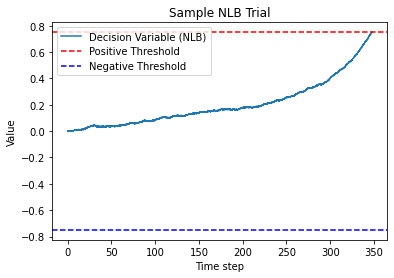

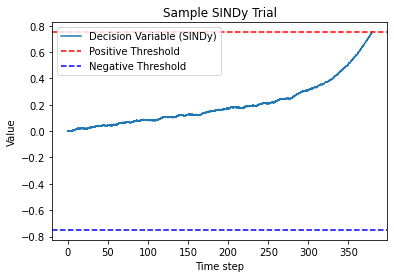

In [7]:
import numpy as np
from nlb_st import sessionSPB

# Define parameters for the session
trials = 10
signal =0.008
seeding = 42  # Example seed for reproducibility

t = np.arange(0, 10000, 0.01)
z = 0.75
# Run the session
coef_mat, choice_trials, sindy_choice, decision_time, sindy_dt, model_data, sindy_data = sessionSPB(trials, signal, seeding)

# Print a summary of the results
print("Number of trials:", trials)
print("Average decision time (NLB):", np.mean(decision_time))
print("Average decision time (SINDy):", np.mean(sindy_dt))
print("NLB choices (1 for Correct, 0 for Incorrect):", choice_trials)
print("SINDy choices (1 for Correct, 0 for Incorrect):", sindy_choice)

# Plot a sample trial from NLB and SINDy data
import matplotlib.pyplot as plt

# Plot NLB sample
sample_x = model_data[0]
plt.plot(t[0:len(sample_x)],sample_x, label='Decision Variable (NLB)')
plt.axhline(z, color='r', linestyle='--', label='Correct')
plt.axhline(-z, color='b', linestyle='--', label='Incorrect')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Sample NLB Trial')
plt.legend()
plt.show()

# Plot SINDy sample
sample_sindy_x = sindy_data[0]
plt.plot(t[0:len(sample_sindy_x)],sample_sindy_x, label='Decision Variable (SINDy)')
plt.axhline(z, color='r', linestyle='--', label='Correct')
plt.axhline(-z, color='b', linestyle='--', label='Incorrect')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Sample SINDy Trial')
plt.legend()
plt.show()


Number of trials: 100
Average decision time (NLB): 439.2186
Average decision time (SINDy): 391.1501
NLB choices (1 for positive threshold, 0 for negative threshold): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
SINDy choices (1 for positive threshold, 0 for negative threshold): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


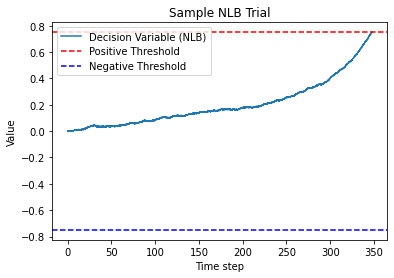

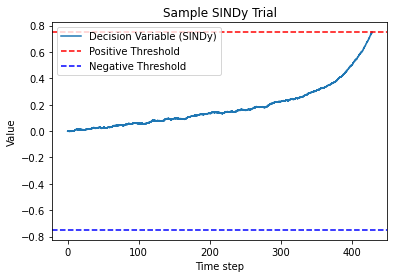

In [8]:
import numpy as np
from nlb_ave import sessionNLB

# Define parameters for the session
trials = 100
signal = signal
seeding = 42  # Example seed for reproducibility
coefs = np.mean(coef_mat,axis=0)  # Example coefficients, replace with actual coefficients

# Run the session
coef_mat, choice_trials, sindy_choice, decision_time, sindy_dt, model_data, sindy_data = sessionNLB(trials, signal, seeding, coefs)

# Print a summary of the results
print("Number of trials:", trials)
print("Average decision time (NLB):", np.mean(decision_time))
print("Average decision time (SINDy):", np.mean(sindy_dt))
print("NLB choices (1 for Correct, 0 for Incorrect):", choice_trials)
print("SINDy choices (1 for Correct, 0 for Incorrect):", sindy_choice)

# Plot a sample trial from NLB and SINDy data
import matplotlib.pyplot as plt

# Plot NLB sample
sample_x = model_data[0]
plt.plot(t[0:len(sample_x)],sample_x, label='Decision Variable (NLB)')
plt.axhline(z, color='r', linestyle='--', label='Correct')
plt.axhline(-z, color='b', linestyle='--', label='Incorrect')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Sample NLB Trial')
plt.legend()
plt.show()

# Plot SINDy sample
sample_sindy_x = sindy_data[0]
plt.plot(t[0:len(sample_sindy_x)],sample_sindy_x, label='Decision Variable (SINDy)')
plt.axhline(z, color='r', linestyle='--', label='Correct')
plt.axhline(-z, color='b', linestyle='--', label='Incorrect')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Sample SINDy Trial')
plt.legend()
plt.show()
